In [51]:
import cv2 
import pytesseract
from matplotlib import pyplot as plt

In [52]:
# Import image
image_address  = r"../examples/FFIFx3YXIAEL7xd.jpeg"
image = cv2.imread(image_address)

In [53]:
# Convert images to RGB format (opencv images in BGR format).
def show_image(target):
    plt.figure(figsize=(15,15))
    plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB), interpolation='nearest')
    plt.show()

In [54]:
# Minimize image noise with grayscaling then slight blurring.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)

# Setup threshold examples. Static threshold sample is used for the rest of processing however,
# adaptive threshold might be more useful when dealing with ranging artifacting & compression
# that would likely be encountered with real-world samples.
static_thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

# Morph open to remove noise and invert image. 'Opening' first 'erodes' the borders of the foreground
# objects and then 'dilates' it to make it bigger again with less noise than before.
# Note: Regarding 'erosion', it should be done with a white foreground (text) for optimal recognition.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(static_thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

static thresh:


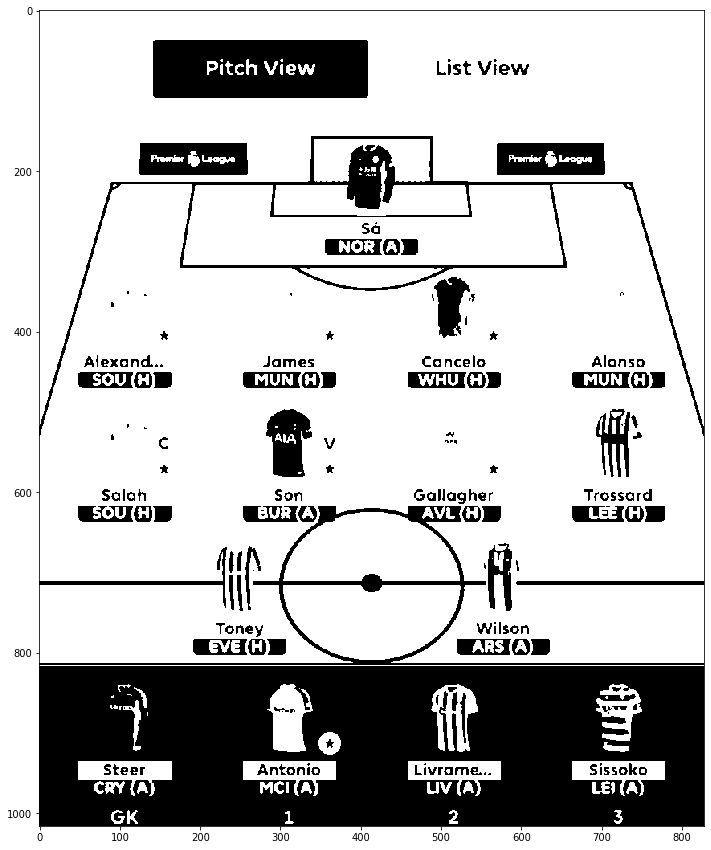

eH
sa
[NOR (A)
—__
ao . Ge, °
1
* * *

Alexand... James Cancelo Alonso
EOD GlIop GLU GlI0p
o. iS
‘oe v am °

* * *
Salah Son Gallagher Trossard
EqZOD |_BUR (A) on {LEE (H) |
——it ff
Toney Wilson
LEVE (H) GLHOnD
i ° =
ery aoe NaS ne
GK 1 2 3

--------------------------------------------------------------------------------


In [55]:
print('static thresh:')
show_image(static_thresh)
print(pytesseract.image_to_string(static_thresh, lang='eng', config='--psm 6'))
print('-'*80)

adaptive thresh:


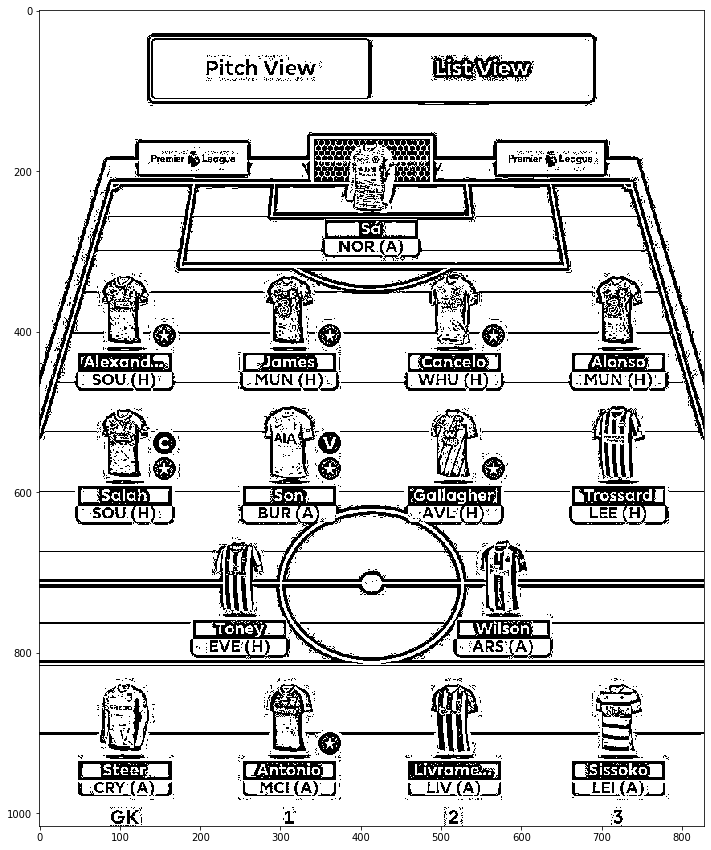

Bitch View: peat
| 7 ==.
|| |e \_\
I lat ft. s é et \
[1-6 E-e ——1@—_l).

\\
esouy (OMUN (HY WHU(H). MUN (H)_--W"
oN OX. dA fiat
Le Be 6 All
—— LEE 1 __ LES. 1 ___ KenL Ey] | |——
Burts —— AVEC { cr J
7 n~——)  —
i _] CMs |
) ie ‘( =
hal —— Lhe —_ Ik —_3—
fan stcormm Ee Antonion] fesissokom]
CRY(A) J ‘UMcr (A) CLV (A)_j \CLEL(A) J
Gi, a tot 3

--------------------------------------------------------------------------------


In [56]:
print('adaptive thresh:')
show_image(adaptive_thresh)
print(pytesseract.image_to_string(adaptive_thresh, lang='eng', config='--psm 6'))
print('-'*80)

opening:


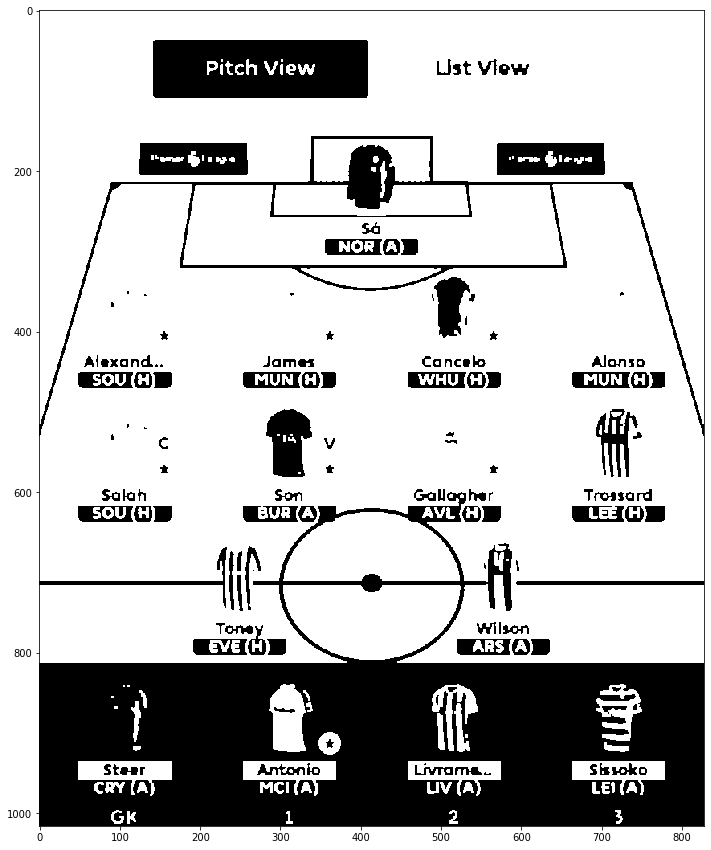

$a
L_NOR (A) |
Seg
ao - A wt .
1
* * *

Alexand.. James Cancelo Ajonso
Eon Glos | WHU (H) Gln
7 : t : “ ft

* * *

Salah Son Gallagher Trossard
E20n Gag Avtu(H) | {LEE (H) |
m (Na
Tore Wilson
Peve tH) ELHOD
t ff ff
! ee
ary) are WAC) aren
GK 1 2 3

--------------------------------------------------------------------------------


In [57]:
# Currently produces the most accurate results.
print('opening:')
show_image(opening)
print(pytesseract.image_to_string(opening, lang='eng', config='--psm 6'))
print('-'*80)

invert:


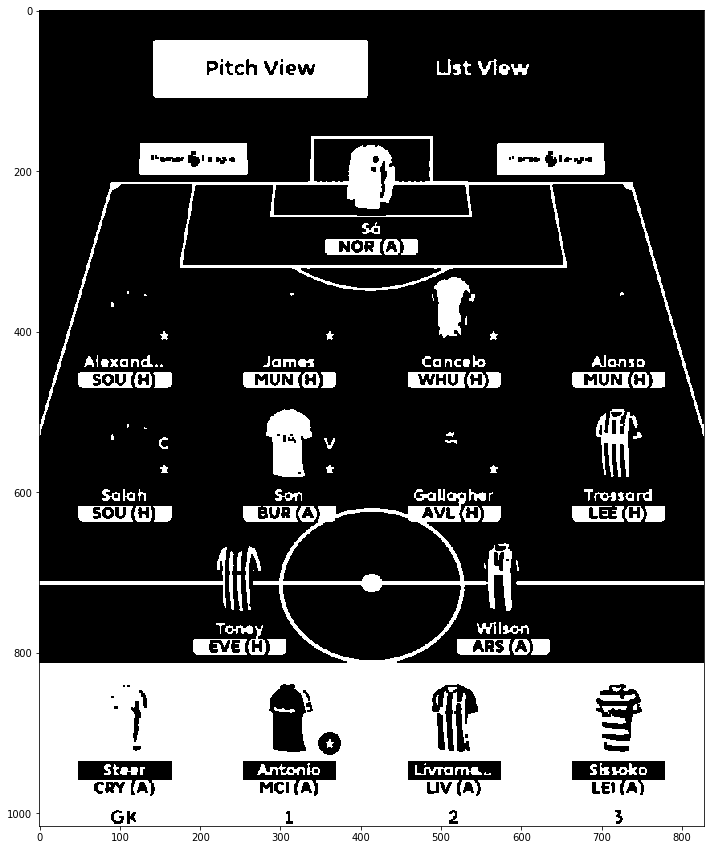

$a
L_NOR (A)
Sg
ao - A wt .
1
* * *

Alexand.. James Cancelo Ajonso
L_SOU (H) L_MUN (+) | WHU (H) | MUN (+)
7 : zt : “ ft

* * *

Salah Son Gallagher Trossard
L_SOU (H) |_BUR (A) Avu(H) | {LEE (H) |
m (Ne
i) Wilson
every LARS (A) _]

t f& ff
o ik &
ary) are WAC) en
GK 1 2 3

--------------------------------------------------------------------------------


In [58]:
print('invert:')
show_image(invert)
print(pytesseract.image_to_string(invert, lang='eng', config='--psm 6'))
print('-'*80)